# Working with stimuli
This page is meant as an introduction to the stimulus module of the combio package.
The examples are intended to get you started as quickly as possible.

## Basic introduction

There are three basic types of objects:

* `Stimulus` objects contain a single stimulus sound.
* `Sequence` objects  contain a sequence of inter-onset intervals (as well as the onsets).
* `StimulusSequence` objects, which are a combination of `Stimulus` objects and a `Sequence` object.
These contain all the functionalities of both the `Stimulus` and `Sequence` objects.

## Importing the package

We first need to import the package. You can do that as follows:

In [2]:
from stimulus import * # this will change

## Stimulus

A stimulus object contains a sound which can be created from scratch, or loaded from a .wav file.

### Loading from a .wav file

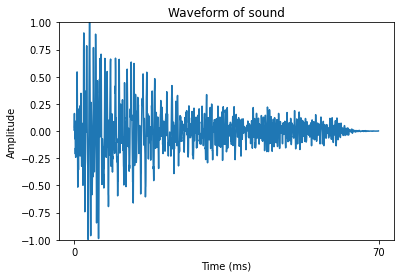

In [6]:
stim = Stimulus.from_wav('click01.wav')
stim.plot()

### Generating stimulus using an oscillator

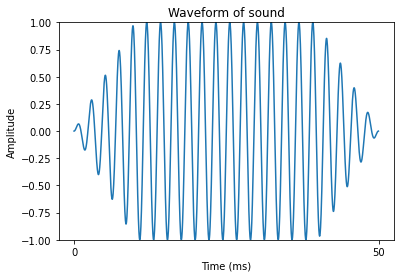

In [8]:
stim = Stimulus.generate(freq=440, duration=50, osc='sine', onramp=10, offramp=10)
stim.play() # Doesn't work in this notebook, but will in most editors
stim.plot()

### Other Stimulus functions

Apart from plotting and playing the Stimulus object, we can change the amplitude,
get the duration of the stimulus or write the Stimulus object to a .wav file:

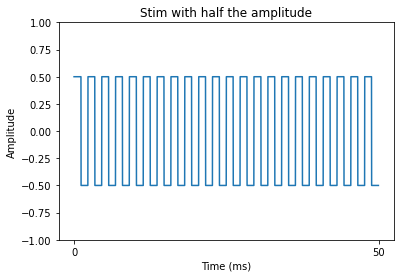

This stimulus lasts: 0.05 seconds.


In [15]:
stim = Stimulus.generate()
stim.change_amplitude(factor=0.5)
stim.plot("Stim with half the amplitude") # For plotting you can provide a title
print(f"This stimulus lasts: {stim.get_duration()} seconds.")
stim.write_wav('test.wav')

## Sequence
Sequence objects contain the _timing_ of events, but do not contain any sound.
We can construct them by passing a list of inter-onset intervals or by using one of the built-in
class methods.

### Constructing Sequence objects

We construct a Sequence object manually by passing it a list of IOIs:

In [19]:
iois = [400, 500, 300, 600, 500]
sequence = Sequence(iois)

print(sequence)

Object of type Sequence (non-metrical version):
6 events
IOIs: [400. 500. 300. 600. 500.]
Onsets:[   0.  400.  900. 1200. 1800. 2300.]



Notice that we passed it 5 IOIs, but that we get 6 event onsets. That's because we always also get
an onset value of 0 at the beginning.

As said, we can also generate sequences using one of these built-in class methods:

- `Stimulus.generate_isochronous(n, ioi)`
- `Stimulus.generate_random_normal(n, mu, sigma)`
- `Stimulus.generate_random_uniform(n, a, b)`
- `Stimulus.generate_random_poisson(n, lam)`
- `Stimulus.generate_random_exponential(n, lam)`

Note that here *n* refers to the number of _events_. So (in principle) you get n-1 IOIs.
An exception to that you'll see later under the 'Metrical' section.

---

Alright, let's look at an example:

In [20]:
sequence = Sequence.generate_isochronous(n=10, ioi=500)
print(sequence)

Object of type Sequence (non-metrical version):
10 events
IOIs: [500. 500. 500. 500. 500. 500. 500. 500. 500.]
Onsets:[   0.  500. 1000. 1500. 2000. 2500. 3000. 3500. 4000. 4500.]



If you want to access just the IOIs or just the onsets, you can do that using `Sequence.iois` or `Sequence.onsets`:

In [22]:
sequence = Sequence.generate_random_normal(n=10, mu=500, sigma=25)
print(sequence.iois)
print(sequence.onsets)


[530. 504. 506. 512. 504. 500. 481. 527. 487.]
[   0.  530. 1034. 1540. 2052. 2556. 3056. 3537. 4064. 4551.]


### Manipulating Sequence objects

We can change the tempo of Sequence objects as such:

In [24]:
sequence = Sequence.generate_isochronous(n=10, ioi=500)
print(sequence.onsets)
sequence.change_tempo(factor=2) # where '2' means twice as fast
print(sequence.onsets)

[   0.  500. 1000. 1500. 2000. 2500. 3000. 3500. 4000. 4500.]
[   0.  250.  500.  750. 1000. 1250. 1500. 1750. 2000. 2250.]


Or linearly, to create a ritardando or accelerando effect:

In [30]:
sequence = Sequence.generate_isochronous(n=5, ioi=500)
sequence.change_tempo_linearly(total_change=2) # accelerando
print(sequence)
sequence = Sequence.generate_isochronous(n=5, ioi=500)
sequence.change_tempo_linearly(total_change=0.5) # ritardando

Object of type Sequence (non-metrical version):
5 events
IOIs: [500. 375. 300. 250.]
Onsets:[   0.  500.  875. 1175. 1425.]



## StimulusSequence objects

Now, of course we want to combine sounds with sequences so we get a real usable stimulus.

That we do by creating a `StimulusSequence` object. We pass it both a `Stimulus` object and a `Sequence` object:

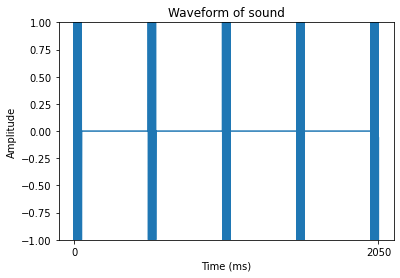

In [32]:
stim = Stimulus.generate()
seq = Sequence.generate_isochronous(n=5, ioi=500)
stim_seq = StimulusSequence(stim, seq)
stim_seq.plot()

All the functions we saw above we can use here as well, for instance:

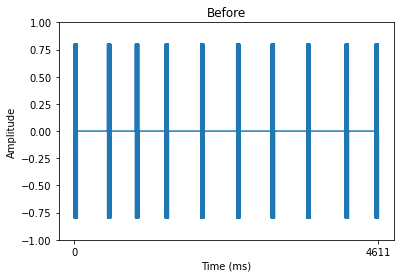

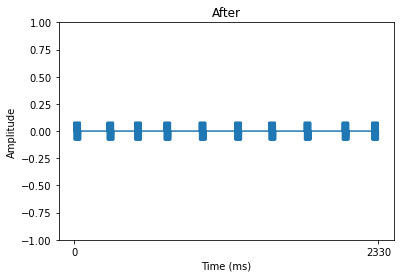

In [34]:
stim = Stimulus.generate(freq=300, amplitude=0.8)
seq = Sequence.generate_random_uniform(n=10, a=400, b=600)
stim_seq = StimulusSequence(stim, seq)

stim_seq.plot("Before")
stim_seq.change_tempo(factor=2)
stim_seq.change_amplitude(0.1)
stim_seq.plot("After")

stim_seq.write_wav('stim_seq.wav')

But what if you want different sounds for each event? For instance, different tone heights for each stimulus?

You can do that by passing StimulusSequence a list of Stimulus objects instead of just a single Stimulus object,
as such:

In [3]:
tone_heights = [400, 300, 600, 500, 700]

stimuli = []

for tone_height in tone_heights:
    stim = Stimulus.generate(freq=tone_height)
    stimuli.append(stim)

seq = Sequence.generate_isochronous(n=5, ioi=500)

stim_seq = StimulusSequence(stimuli, seq)

stim_seq.play()

## Metrical sequences

### Creating metrical sequences
Finally, we can work with sequences that are metrical in the sense that they adhere to a metrical
(rhythmic) grid, like in music. The difference between metrical sequences and non-metrical sequences is
that we have an equal number of IOIs and onsets, because after the final event has played, we have a pause until
we're at the next metrical bar.

To do that, we create a Sequence object with a `metrical=True` flag:


In [5]:
met_seq = Sequence.generate_isochronous(n=5, ioi=500, metrical=True)
print(met_seq)

Object of type Sequence (metrical version):
5 events
IOIs: [500. 500. 500. 500. 500.]
Onsets:[   0.  500. 1000. 1500. 2000.]



### Random rhythmic sequences
There's a fun function that can  create a random rhythmic sequence of one bar long
on the basis of allowed note values
(e.g. 1/4th notes, 1/8th notes, 1/16th notes etc.), a time signature, and a value for how long a 1/4th note
should last in milliseconds:

Object of type StimulusSequence (metrical version).
IOIs: [125. 250. 125. 250. 250. 250. 125. 125. 125. 125. 125. 125.]
Onsets:[   0.  125.  375.  500.  750. 1000. 1250. 1375. 1500. 1625. 1750. 1875.]



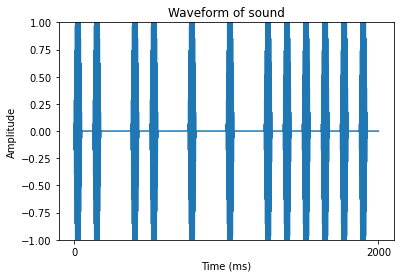

In [10]:
stim = Stimulus.generate(freq=440, onramp=10, offramp=10)

rand_seq = random_metrical_sequence(allowed_note_values=[4, 8, 16],
                                    time_signature=(4, 4),
                                    quarternote_ms=500)
rand_stim_seq = StimulusSequence(stim, rand_seq)
print(rand_stim_seq)
rand_stim_seq.plot()
rand_stim_seq.play()

### Joining metrical sequences

Metrical `Sequence` or `StimulusSequence` objects (and also `Stimulus` objects) you can join to
create one large `Sequence` or `StimulusSequence` object using the `join` function.
Here's a crazy example:


In [11]:
import random

random_stim_seqs = []

for x in range(10):
    rand_seq = random_metrical_sequence([4, 8, 16], time_signature=(4,4), quarternote_ms=500)
    stimuli = []
    for event in rand_seq.onsets:
        tone_height = random.randint(200, 800) # get a random tone height frequency
        stim = Stimulus.generate(freq=tone_height, onramp=5, offramp=5)
        stimuli.append(stim)
    random_stim_seq = StimulusSequence(stimuli, rand_seq)
    random_stim_seqs.append(random_stim_seq)

one_big_random_sequence = join(random_stim_seqs)

one_big_random_sequence.play()
one_big_random_sequence.write_wav('crazy_sequence.wav')

